### Cálculo da força da barra e velocidade circular

Andressa Wille, 24/01/2023

In [1]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from bar_funcs import *

In [2]:
plt.rc('text', usetex=True)
#plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
path_08 = 'factor_0.8/'
path_12 = 'factor_1.2/'
path_14 = 'factor_1.4/'
paths = [path_08, path_12, path_14]

In [4]:
n_snapshots = 101

In [5]:
#arrays para força da barra
time_08 = np.empty(n_snapshots)
A2_08 = np.empty(n_snapshots)

time_12 = np.empty(n_snapshots)
A2_12 = np.empty(n_snapshots)

time_14 = np.empty(n_snapshots)
A2_14 = np.empty(n_snapshots)

In [6]:
#arrays para velocidade circular
v_c_disk_08 = np.empty(n_snapshots)
v_c_halo_08 = np.empty(n_snapshots)
v_c_08 = np.empty(n_snapshots)
r_08 = np.empty(n_snapshots)

v_c_disk_12 = np.empty(n_snapshots)
v_c_halo_12 = np.empty(n_snapshots)
v_c_12 = np.empty(n_snapshots)
r_12 = np.empty(n_snapshots)

v_c_disk_14 = np.empty(n_snapshots)
v_c_halo_14 = np.empty(n_snapshots)
v_c_14 = np.empty(n_snapshots)
r_14 = np.empty(n_snapshots)

In [7]:
#força da barra
for p, path in enumerate(paths):

    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info tempo
        if p == 0:
            time_08[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_12[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 2:
            time_14[j] = round(f['Header'].attrs['Time'], 2)

        #ler info disco
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        m_disk = np.array(f_disk['Masses'])

        #corrigir posição
        x_new_disk, y_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk)
        
        #calcular força da barra
        if p == 0:
            A2_08[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=10.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        
        if p == 1:
            A2_12[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=10.0, Nbins=30,
                                    n_snapshots=n_snapshots)

        if p == 2:
            A2_14[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=10.0, Nbins=30,
                                    n_snapshots=n_snapshots)

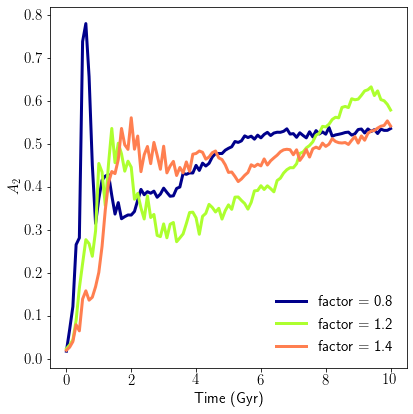

In [22]:
plt.figure(figsize=[6,6])
plt.plot(time_08, A2_08, color='darkblue', lw=3, label='factor = 0.8')
plt.plot(time_12, A2_12, color='greenyellow', lw=3, label='factor = 1.2')
plt.plot(time_14, A2_14, color='coral', lw=3, label='factor = 1.4')
plt.xlabel('Time (Gyr)', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('a2_factors.png')

In [8]:
#velocidade circular
for p, path in enumerate(paths):
    snapshot = path + f'snapshot_100.hdf5' # qual snapshot usar? t=10 Gyr???

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
        
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #corrigir posição
    x_new_disk, y_new_disk, z_new_disk, x_new_halo, y_new_halo, z_new_halo = shift_com_2(m_disk,
                                            x_disk, y_disk, z_disk, m_halo, x_halo, y_halo, z_halo)
    
    #calcular velocidade circular
    if p == 0:
        v_c_disk_08, v_c_halo_08, v_c_08, r_08 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)
        
    if p == 1:
        v_c_disk_12, v_c_halo_12, v_c_12, r_12 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)
            
    if p == 2:
        v_c_disk_14, v_c_halo_14, v_c_14, r_14 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)
        


In [16]:
r = [r_08, r_12, r_14]
v_c_disk = [v_c_disk_08, v_c_disk_12, v_c_disk_14]
v_c_halo = [v_c_halo_08, v_c_halo_12, v_c_halo_14]
v_c = [v_c_08, v_c_12, v_c_14]

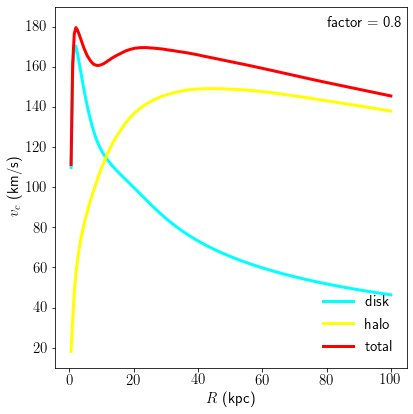

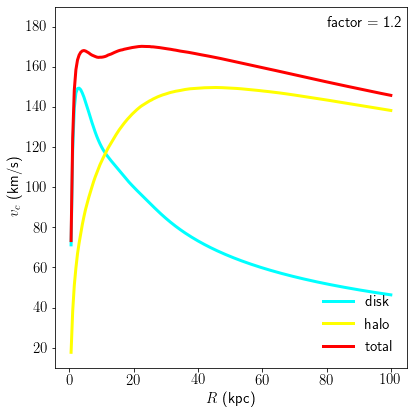

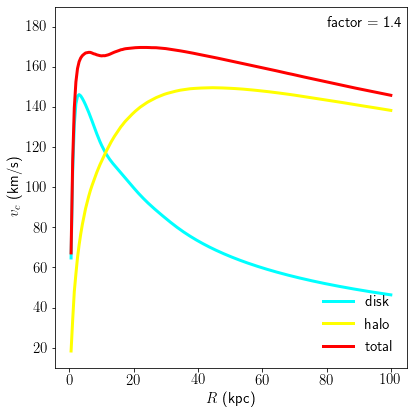

In [26]:
for i in range (0, 3):
    plt.figure(figsize=[6,6])
    plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
    plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
    plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
    plt.xlabel('$R$ (kpc)', fontsize=15)
    plt.ylabel('$v_c$ (km/s)', fontsize=15)
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(10, 190)
    
    if i == 0:
        text ='factor = 0.8'
    if i == 1:
        text ='factor = 1.2'
    if i == 2:
        text ='factor = 1.4'
        
    plt.text(80, 180, text, fontsize=15)
    
    plt.tight_layout()
    plt.savefig(f'vc_factors_{i}.png')